In [70]:
import uproot3
import matplotlib.pyplot as plt
import math
import numpy as np

from   matplotlib import colors

plt.style.use('seaborn-whitegrid')

# plt.rcParams["figure.figsize"]  = (25.6,9.6)
plt.rcParams["figure.figsize"]  = (20.0, 10.0)

plt.rcParams["image.origin"]    = 'lower'

In [ ]:
Neta    = 96
Nphi    = 256
shape   = (Neta, Nphi)

barrel  = np.zeros(shape, dtype=float)

Ntotal = shape[0]*shape[1]
print("Total channels", Ntotal)

tower_map = np.zeros((300,2), dtype=int)


for n in range(300):
    eta = n // Nphi
    phi = n %  Nphi
    tower_map[n] =  [eta, phi]

print(tower_map)

In [74]:
def pseudorap(p):
    pTot = math.sqrt(p[0]**2+p[1]**2+p[2]**2)
    return math.atanh(p[2]/pTot)

In [79]:
infile = '~/data/mc/pi0_10k.root'
file   = uproot3.open(infile)

dir         = file['ttree']
p_branch    = dir['p']
Nentries    = p_branch.numentries

N_branch        = dir["N"]
nlive_branch    = dir["nlive"]
p_branch        = dir["p"]
energy_branch   = dir["energy"]

N       = N_branch.array()
nlive   = nlive_branch.array()
p       = p_branch.array()
energy  = energy_branch.array()


total_energy    = []
etas            = []

for i in range(Nentries): # loop over the data sample
    ntowers = nlive[i]
    e = energy[i]

    en = 0.0
    for nt in range(ntowers):
        en+=e[nt]

    total_energy.append(en)
    etas.append(pseudorap(p[i]))

print(len(total_energy))


10000


/tmp/ipykernel_2030/2887604733.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = axs[1].hist2d(etas, total_energy, bins=(100,100), norm=colors.LogNorm(1.0), cmap='plasma')


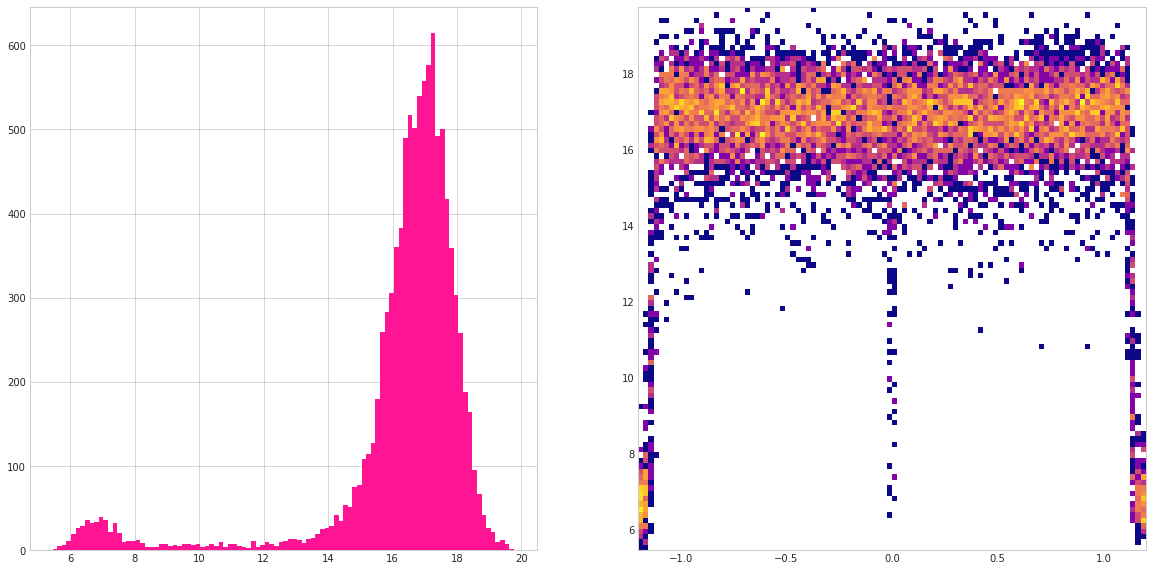

In [80]:
fig, axs = plt.subplots(1,2)

_ = axs[0].hist(total_energy, bins=100, color='deeppink')
_ = axs[1].hist2d(etas, total_energy, bins=(100,100), norm=colors.LogNorm(1.0), cmap='plasma')

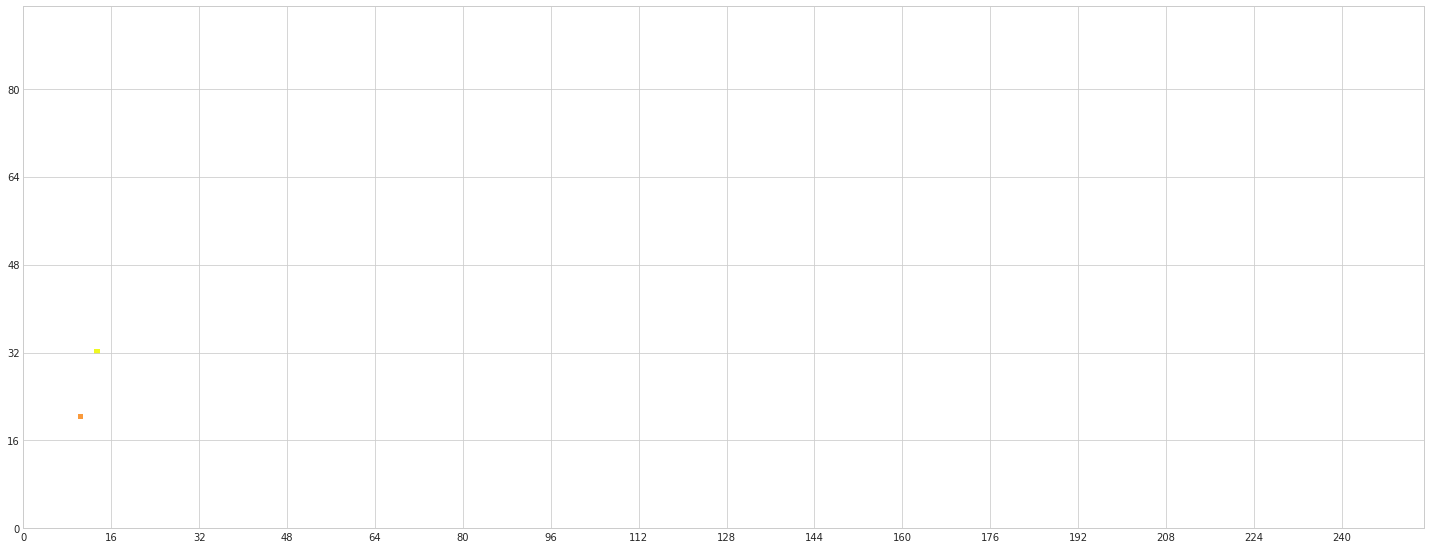

In [34]:
fig, axs = plt.subplots(1)

axs.set_xticks(np.arange(0, shape[1], 16))
axs.set_yticks(np.arange(0, shape[0], 16))

axs.imshow(barrel, extent=(0.0, 255.0, 0.0, 95.0), norm=colors.LogNorm(1.0), cmap='plasma')